In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Mounted at /gdrive
INFO:tensorflow:Restoring parameters from /gdrive/My Drive/URDU_V2_Exp/wap_exp/model2/cp-0045-25.278371.ckpt


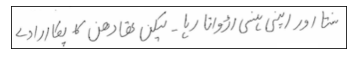

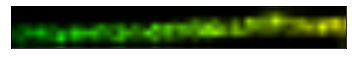

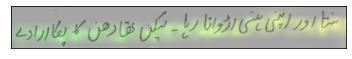

سنتا اور اپنی پہنی لڑواتا رہا۔ لیکن تھا دھن کا پکاراد


In [ ]:
running_on_colab = True
if running_on_colab == True:
  ##to upload files at google drive while running using colab
  from google.colab import files
  uploaded = files.upload()
  uploaded = files.upload()
  uploaded = files.upload()


  # only include while running on Google Colab
  from google.colab import drive
  drive.mount('/gdrive', force_remount = True)
  data_folder = '/gdrive/My Drive/CALText/data/PUCIT_OHUL/'
  model_folder = '/gdrive/My Drive/CALText/model/'
  sample_images_folder = '/gdrive/My Drive/CALText/PUCIT_OHUL Test Images/'
else:
  data_folder = 'data/PUCIT_OHUL/'
  model_folder = 'model/'
  sample_images_folder = 'PUCIT_OHUL Test Images/'



import tensorflow as tf
from tensorflow.contrib.layers import batch_norm
from skimage.transform import rescale, resize
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import cv2
import CALTextModel
import data
import utility

MAX_LEN=130
BEAM_SIZE=10

def main(): 
    worddicts,vocabulary_count, _ = utility.load_dict_picklefile(data_folder + 'vocabulary.pkl')
    num_classes=vocabulary_count+1
    with tf.Graph().as_default():
    		model = CALTextModel.Model()##one extra class for EOL symbol
    		model.build_model(num_classes)
    		config = tf.ConfigProto()
    		config.gpu_options.allow_growth=True
    		init = tf.global_variables_initializer()
    
    		saver = tf.train.Saver()
    		with tf.Session() as sess:

    			sess.run(init)
    			saver.restore(sess, model_folder + 'current_best_model.ckpt')
    			img = cv2.imread(sample_images_folder + '96-22.png',-1)

    			if img is not None: 
    				img, xx_pad=data.preprocess_img(img)  
    				sequence,spatio_attention=CALTextModel.model_infer(model, sess, xx_pad, MAX_LEN, BEAM_SIZE)
    				visualize_att=utility.visualize_temporaly(spatio_attention,len(sequence))
    				decoded_str=utility.decode_sequence(sequence,worddicts)

    				plt.imshow(img, cmap='gray')
    				plt.xticks([])
    				plt.yticks([])
    				plt.show()
				
    				plt.imshow(visualize_att)
    				plt.xticks([])
    				plt.yticks([])
    				plt.show()
			
    				plt.imshow(img, cmap='gray')
    				plt.imshow(visualize_att, alpha=0.35)
    				plt.xticks([])
    				plt.yticks([])	
    				plt.show()		     			    					

    				print(decoded_str)
    				

if __name__ == "__main__":
	main()
